In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
#upload dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Assumptions
---

1. All recorded medical data is accurate.
2. A final output of 1 means a positive diagnosis, with 0 indicating a negative diagnosis.
3. A null value in final output can be interpreted as a value of 0.
4. All patients were diagnosed with dengue after all data was recorded.
5. Biological sex is not a risk factor for dengue infection.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Delayed Baddies/Dengue diseases dataset.csv")

In [ ]:
df.head()

,Age,Sex,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
0,43,Male,12.6,2200.0,1,1,62000.0,11.0,1.0
1,45,Male,13.2,3000.0,0,1,17000.0,17.0,1.0
2,50,Female,11.0,3300.0,1,1,19000.0,16.3,1.0
3,57,Female,11.9,3500.0,1,0,29000.0,14.0,1.0
4,51,Female,13.0,3100.0,0,1,30000.0,14.5,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           979 non-null    float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      986 non-null    float64
 7   PDW                 984 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ KB


In [ ]:
df.shape

(1003, 9)

In [ ]:
df = df.drop('Sex', axis=1)

# Exploratory Data Analysis

In [ ]:
# Measures of Central Tendency
df.describe()

,Age,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
count,1003.000000,1003.000000,979.000000,1003.000000,1003.000000,986.000000,984.000000,989.000000
mean,42.252243,13.704985,4319.816139,0.938185,0.937188,114202.719067,22.741768,0.676441
std,20.973160,1.482410,2333.300226,0.240939,0.242745,89000.982480,14.619862,0.468071
min,3.000000,11.000000,2000.000000,0.000000,0.000000,10000.000000,1.000000,0.000000
25%,27.000000,12.600000,2600.000000,1.000000,1.000000,46000.000000,14.000000,0.000000
50%,41.000000,13.700000,3200.000000,1.000000,1.000000,92000.000000,17.700000,1.000000
75%,55.000000,15.000000,5900.000000,1.000000,1.000000,162500.000000,27.800000,1.000000
max,120.000000,25.000000,10900.000000,1.000000,1.000000,500000.000000,215.000000,1.000000


In [ ]:
# Correlation between numerical features
df.corr()

,Age,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
Age,1.000000,-0.100095,0.133058,0.057993,0.049966,0.060361,-0.140512,-0.166069
Haemoglobin,-0.100095,1.000000,0.005941,0.032438,-0.012996,0.037789,0.135704,-0.004311
WBC Count,0.133058,0.005941,1.000000,0.160199,0.165998,0.748905,0.349458,-0.917491
Differential Count,0.057993,0.032438,0.160199,1.000000,-0.015260,0.138290,0.101552,-0.175764
RBC PANEL,0.049966,-0.012996,0.165998,-0.015260,1.000000,0.122603,0.100092,-0.177318
Platelet Count,0.060361,0.037789,0.748905,0.138290,0.122603,1.000000,0.453389,-0.787946
PDW,-0.140512,0.135704,0.349458,0.101552,0.100092,0.453389,1.000000,-0.347958
Final Output,-0.166069,-0.004311,-0.917491,-0.175764,-0.177318,-0.787946,-0.347958,1.000000


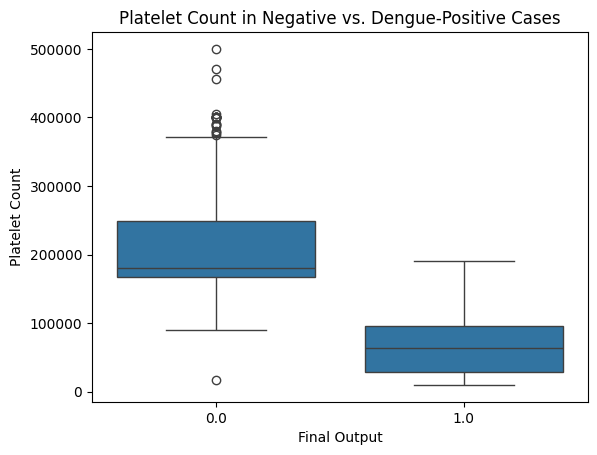

In [ ]:
sns.boxplot(x='Final Output', y='Platelet Count', data=df)
plt.title("Platelet Count in Negative vs. Dengue-Positive Cases")
plt.show()

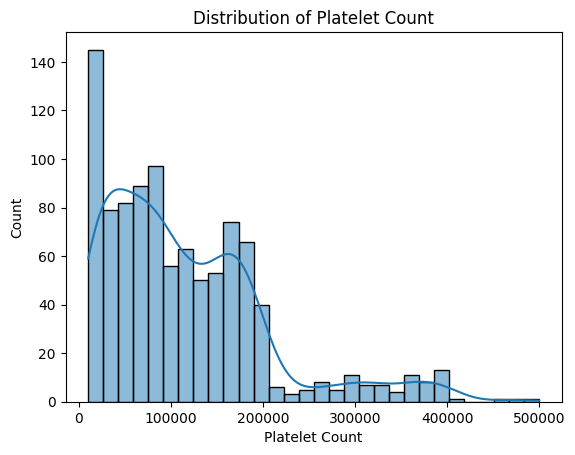

In [ ]:
# Histogram
sns.histplot(df['Platelet Count'].dropna(), bins=30, kde=True)
plt.title("Distribution of Platelet Count")
plt.show()

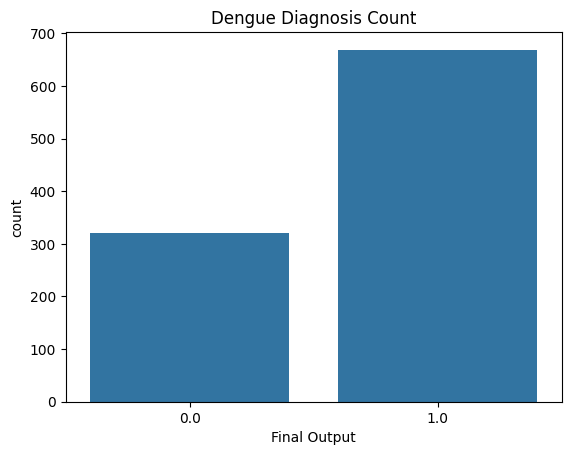

In [ ]:
sns.countplot(x='Final Output', data=df)
plt.title("Dengue Diagnosis Count")
plt.show()

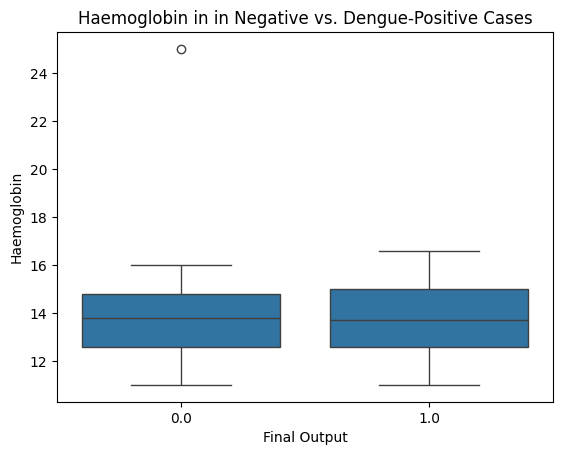

In [ ]:
# NOTE: There seems to be outlier data for the negative case
sns.boxplot(x='Final Output', y='Haemoglobin', data=df)
plt.title("Haemoglobin in in Negative vs. Dengue-Positive Cases")
plt.show()

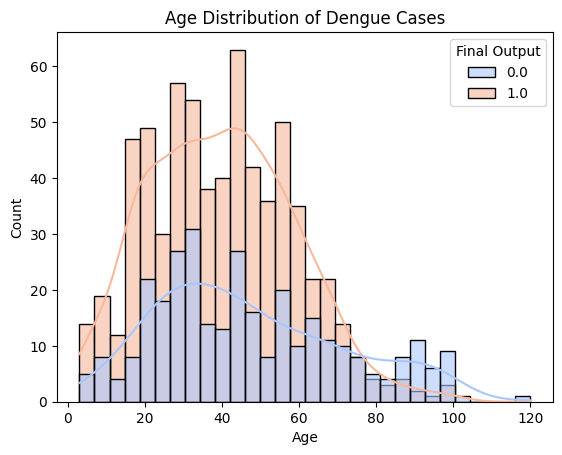

In [ ]:
sns.histplot(df, x="Age", hue="Final Output", bins=30, kde=True, palette="coolwarm", alpha=0.6)
plt.title("Age Distribution of Dengue Cases")
plt.show()

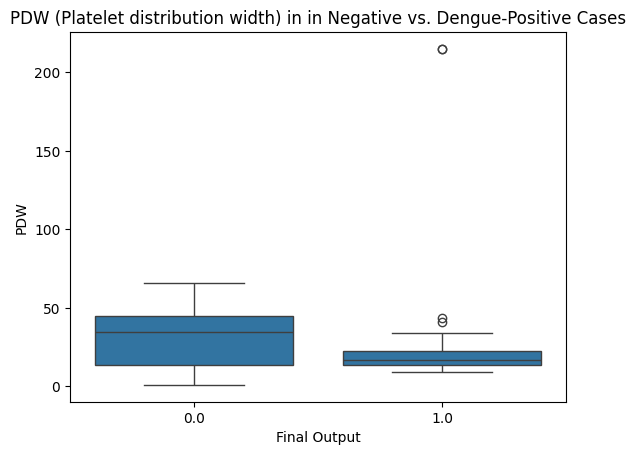

In [ ]:
# NOTE: There seems to be outlier data for the POSITIVE cases
sns.boxplot(x='Final Output', y='PDW', data=df)
plt.title("PDW (Platelet distribution width) in in Negative vs. Dengue-Positive Cases")
plt.show()

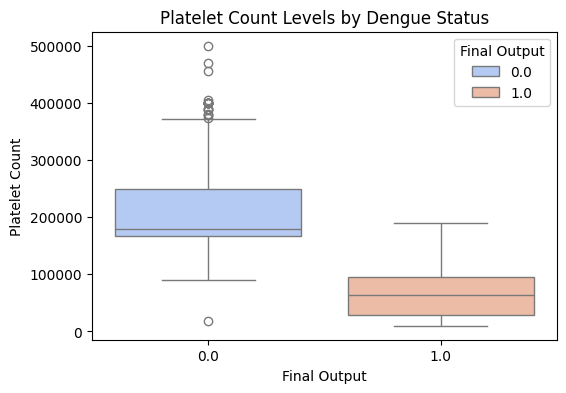

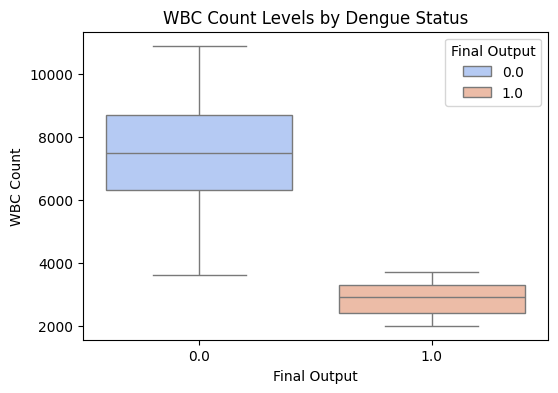

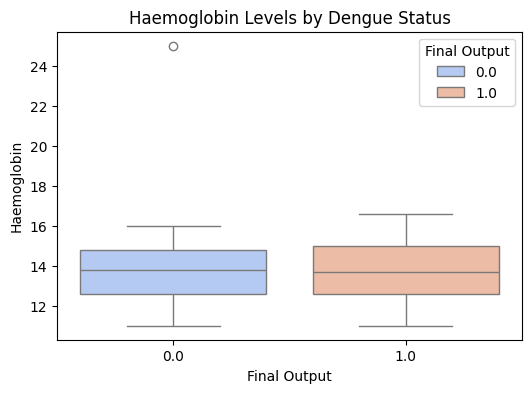

In [ ]:
features = ["Platelet Count", "WBC Count", "Haemoglobin"]
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Final Output", y=feature, hue="Final Output", data=df, palette="coolwarm")
    plt.title(f"{feature} Levels by Dengue Status")
    plt.show()


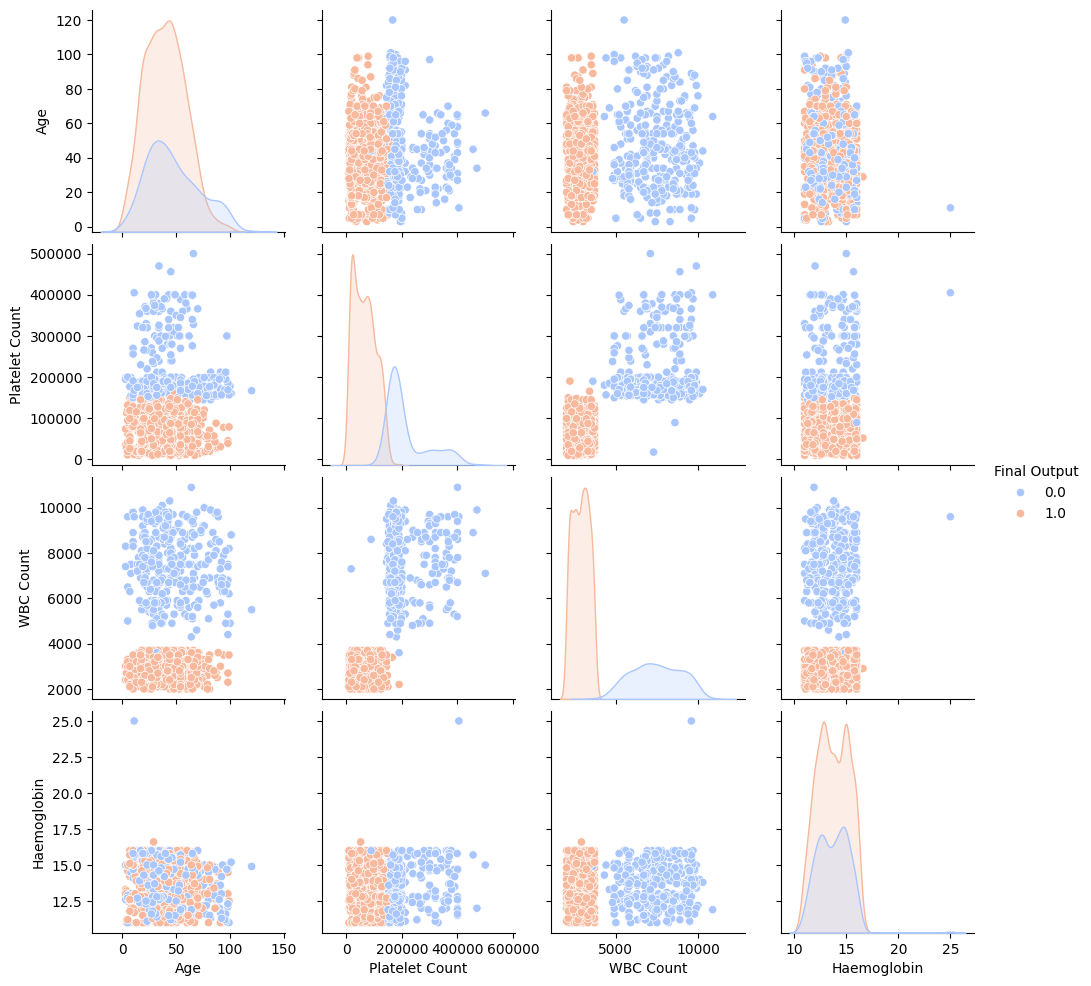

In [ ]:
sns.pairplot(df, hue="Final Output", vars=["Age", "Platelet Count", "WBC Count", "Haemoglobin"], palette="coolwarm")
plt.show()

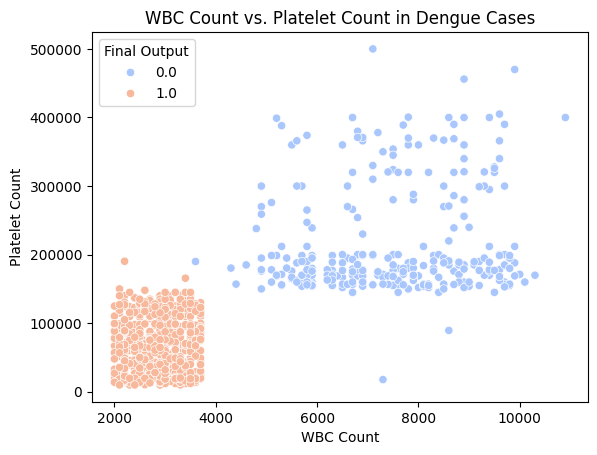

In [ ]:
sns.scatterplot(x="WBC Count", y="Platelet Count", hue="Final Output", data=df, palette="coolwarm")
plt.title("WBC Count vs. Platelet Count in Dengue Cases")
plt.show()


#Preprocessing and Cleaning Data

In [4]:
# changing df final output to integer form and replacing null values with 0
df['Final Output'] = df['Final Output'].fillna(0)
df['Final Output'] = df['Final Output'].astype(int)

In [5]:
# imputation of missing features by replacing with the median
df['Platelet Count'] = df['Platelet Count'].fillna(df['Platelet Count'].median())
df['WBC Count'] = df['WBC Count'].fillna(df['WBC Count'].median())
df['PDW'] = df['PDW'].fillna(df['PDW'].mean())

In [6]:
# removal of outliers with the IQR method
features = ["Platelet Count", "WBC Count", "Haemoglobin"]
for feature in features:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# feature scaling using StandardScaler

df = df.dropna().reset_index(drop=True)
df = pd.get_dummies(df, drop_first=True)

y = df['Final Output']
X = df.drop('Final Output', axis=1)

# 60/20/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Drop rows with NaN values; Let me know if you want to replace with the means instead
print(df)

     Age  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0     43         12.6     2200.0                   1          1   
1     45         13.2     3000.0                   0          1   
2     50         11.0     3300.0                   1          1   
3     57         11.9     3500.0                   1          0   
4     51         13.0     3100.0                   0          1   
..   ...          ...        ...                 ...        ...   
956   43         11.5     6700.0                   1          1   
957   52         13.2     9300.0                   1          1   
958   19         15.8     7400.0                   1          1   
959   34         14.6     9500.0                   1          1   
960   32         12.8     6700.0                   1          1   

     Platelet Count   PDW  Final Output  Sex_Female  Sex_Male  
0           62000.0  11.0             1       False      True  
1           17000.0  17.0             1       False      True  
2  

# ML Training


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

### Validation checking

In [12]:
y_val_logreg = logreg.predict(X_val_scaled)
y_val_knn = knn.predict(X_val_scaled)
accuracy_logreg = accuracy_score(y_val, y_val_logreg)
accuracy_knn = accuracy_score(y_val, y_val_knn)
print("LogReg Accuracy:", accuracy_logreg)
print("KNN Accuracy:", accuracy_knn)

LogReg Accuracy: 0.9895833333333334
KNN Accuracy: 0.9791666666666666


LogReg Confusion Matrix:
[[ 51   6]
 [  0 136]]
LogReg AUC-ROC Score: 0.9694


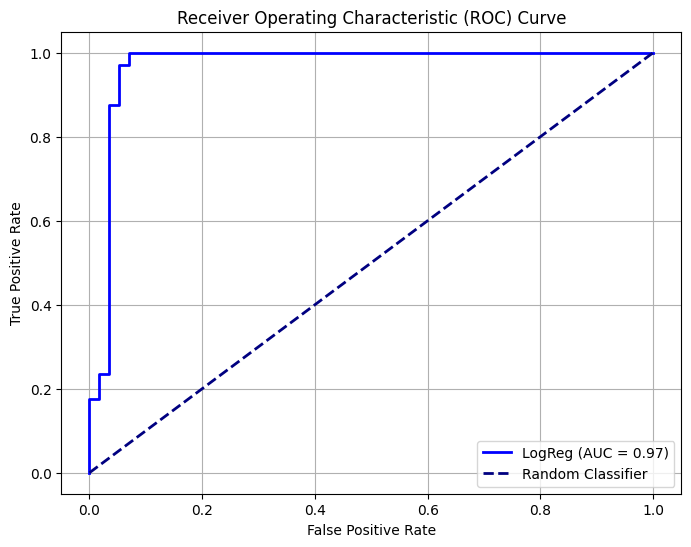

In [14]:
y_pred_logreg = logreg.predict(X_test_scaled)

# Confusion Matrix
print("LogReg Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# AUC-ROC Curve
logreg_probs = logreg.predict_proba(X_test_scaled)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Print AUC Scores
print(f"LogReg AUC-ROC Score: {roc_auc_logreg:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'LogReg (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()